--- STEP #0: COLAB SETUP AND IMPORTS ---
Mounted at /content/drive
Google Drive mounted successfully.

--- Checking for GPU ---
TensorFlow is using the following GPU(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU memory growth enabled.

--- STEP #1: PROBLEM STATEMENT AND BUSINESS CASE ---
Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples.
Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.
The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat
5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels.
Each pixel has a single pixel-value associated with it, indicating lightness or darkness (0-255).

--- STEP #2: IMPORTING DATA ---

Attempting to load data from: /content/drive/MyDrive/fashion-mnist_train.csv
Counting lines for progress bar esti

Reading fashion-mnist_train.csv:   0%|          | 0/6 [00:00<?, ?it/s]

Successfully loaded fashion-mnist_train.csv. Shape: (60000, 785)

Attempting to load data from: /content/drive/MyDrive/fashion-mnist_test.csv
Counting lines for progress bar estimation...
Estimated total lines in file: 10001


Reading fashion-mnist_test.csv:   0%|          | 0/1 [00:00<?, ?it/s]

Successfully loaded fashion-mnist_test.csv. Shape: (10000, 785)

--- STEP #3: VISUALIZATION OF THE DATASET ---

Head of the training dataset:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  

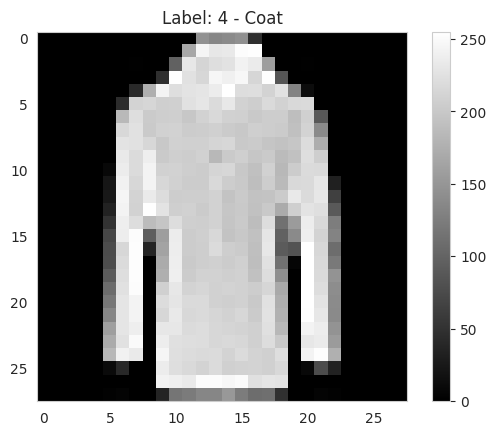


Displaying a grid of random images from training set:


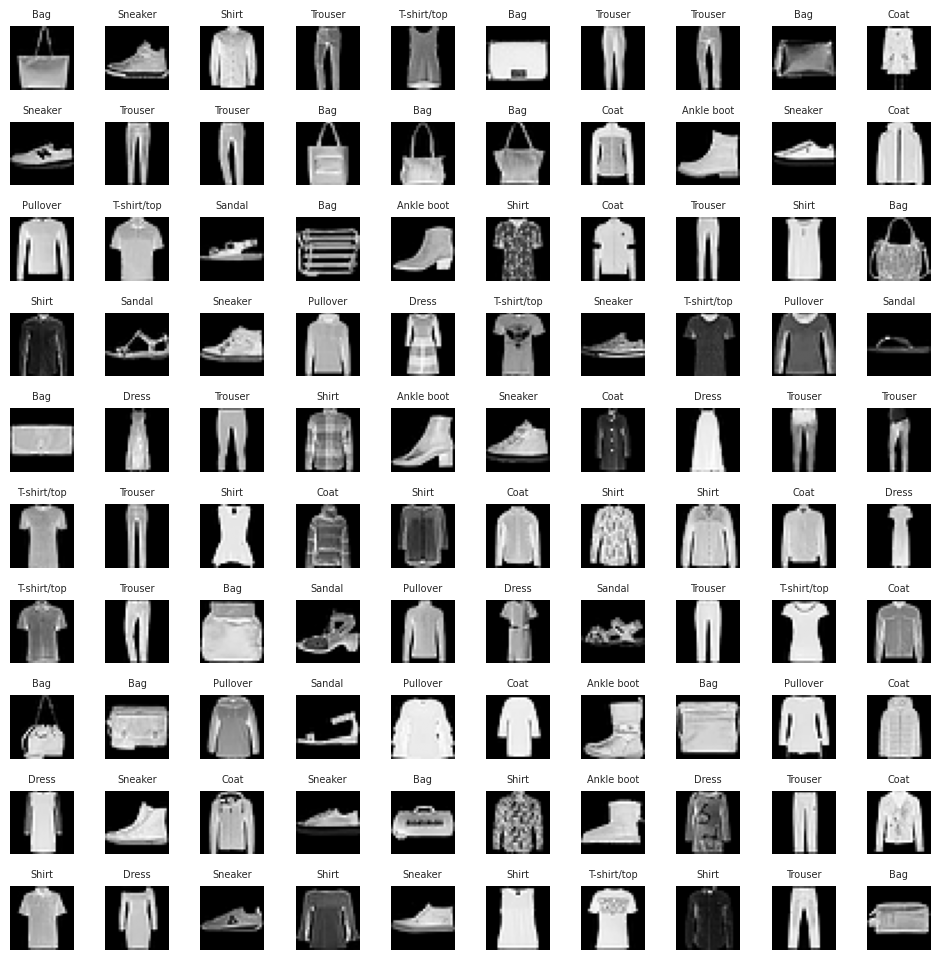


X_train_raw shape: (60000, 784)

Displaying first 25 images from preprocessed X_train_raw:


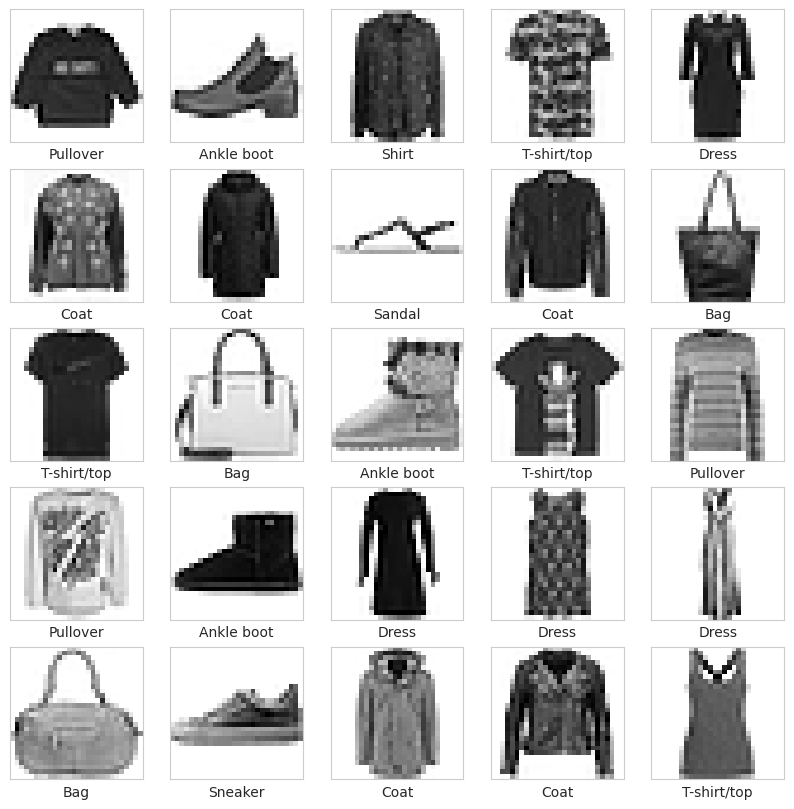


Plotting class distributions:


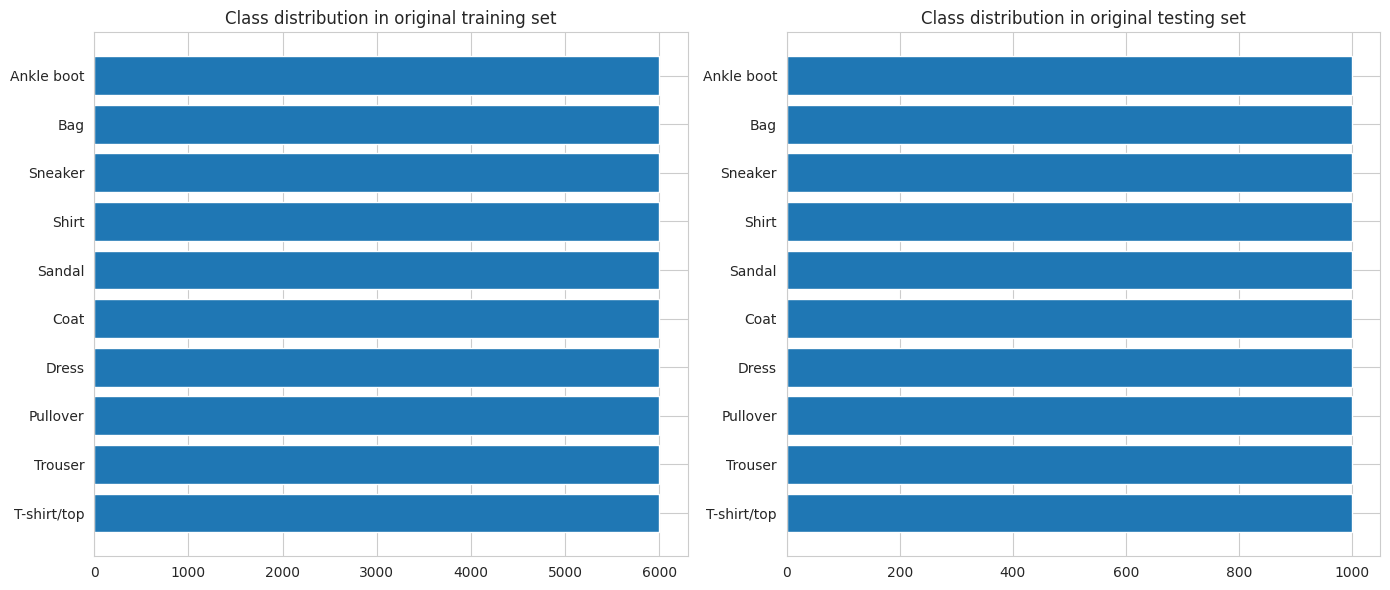


--- STEP #4: TRAINING THE MODEL ---

Shape of X_train_split: (48000, 784)
Shape of y_train_split: (48000,)
Shape of X_validate_split: (12000, 784)
Shape of y_validate_split: (12000,)

Shape of X_train_cnn for model input: (48000, 28, 28, 1)
Shape of X_validate_cnn for model input: (12000, 28, 28, 1)
Shape of X_test_cnn for model input: (10000, 28, 28, 1)

Building the CNN model (with tf.keras.Input)...

Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,098 (1.79 MB)

 Trainable params: 468,458 (1.79 MB)

 Non-trainable params: 640 (2.50 KB)


Compiling the model...

Training the model (this will be slower on CPU)...
Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - accuracy: 0.6914 - loss: 0.9649 - val_accuracy: 0.1953 - val_loss: 2.4307
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8549 - loss: 0.4048 - val_accuracy: 0.3558 - val_loss: 2.1157
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8823 - loss: 0.3349 - val_accuracy: 0.5893 - val_loss: 1.6189
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8957 - loss: 0.2965 - val_accuracy: 0.6781 - val_loss: 1.1553
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9048 - loss: 0.2699 - val_accuracy: 0.7688 - val_loss: 0.7697
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9119 - loss: 0.2443 - val_accuracy: 0.8278 - val_loss: 0.4894
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9150 - loss: 0.2372 - val_accuracy: 0.8662 - val_loss: 0.3872
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━

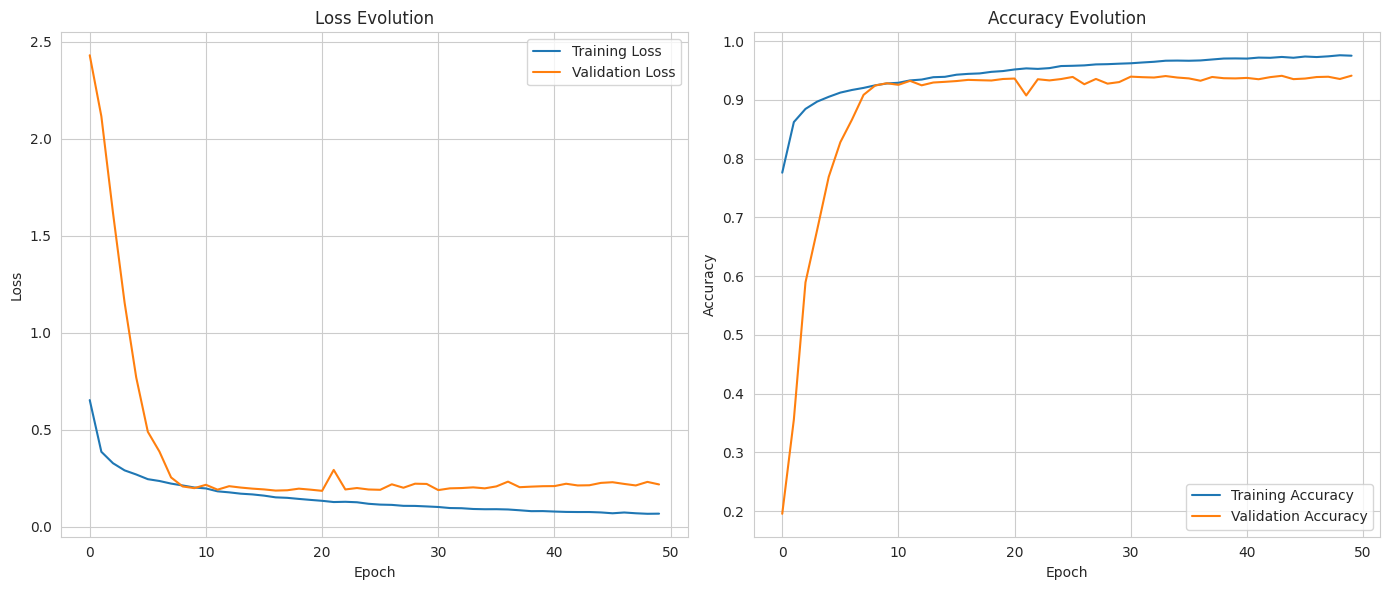


Evaluating model on the test set...
Test Loss: 0.2095
Test Accuracy: 0.9396

Making predictions on the test set...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Displaying some test images with their predicted and true labels:


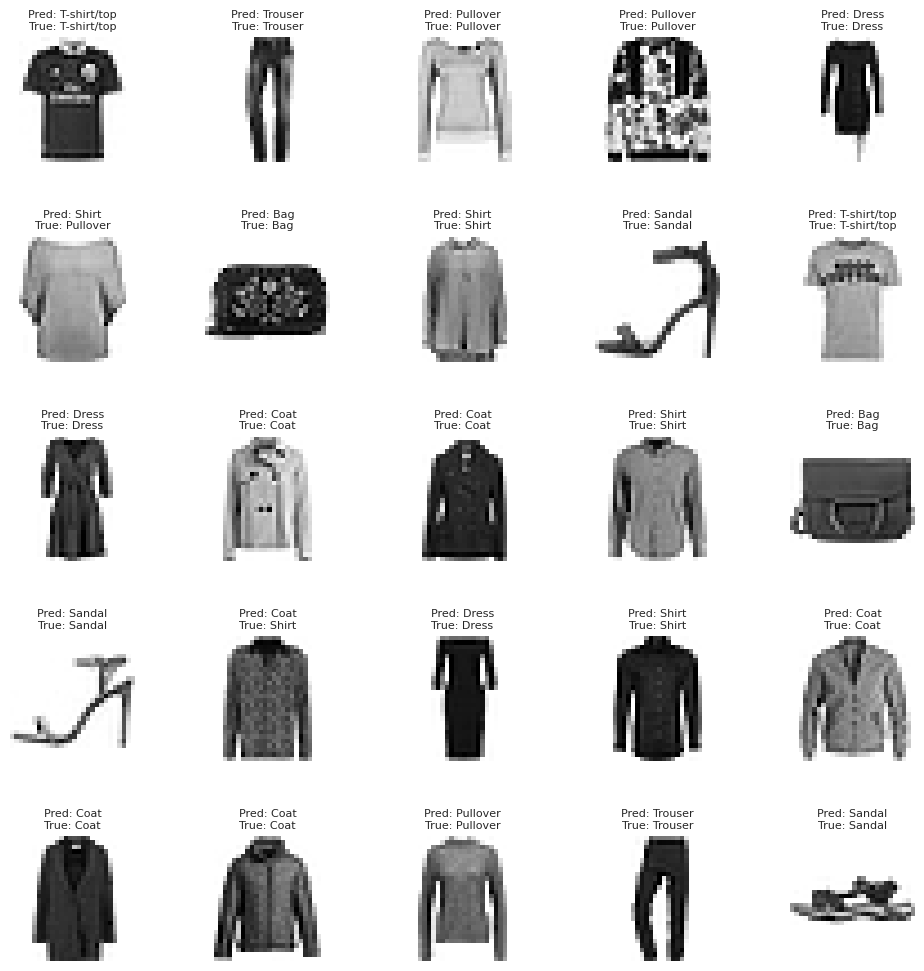


Generating and displaying Confusion Matrix...


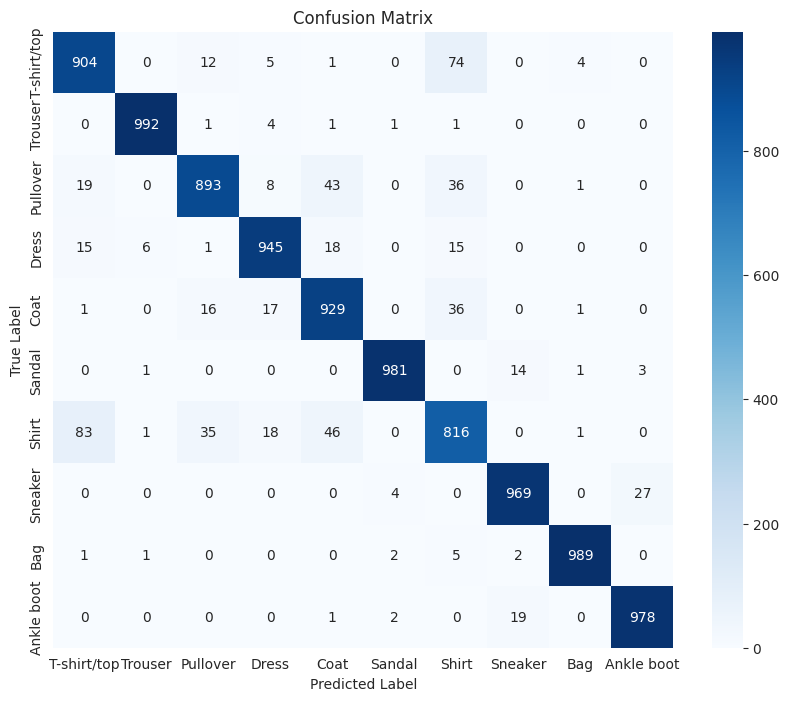


--- SCRIPT EXECUTION FINISHED ---


In [2]:
# STEP #0: COLAB SETUP AND IMPORTS
print("--- STEP #0: COLAB SETUP AND IMPORTS ---")

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from google.colab import drive
from tqdm.notebook import tqdm # For progress bars in Colab

# Mount Google Drive
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully.")
except Exception as e:
    print(f"Error mounting Google Drive: {e}")
    raise SystemExit("Google Drive could not be mounted. Please check permissions. Halting execution.")

# Check for GPU (will inform if CPU is being used)
print("\n--- Checking for GPU ---")
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print(f"TensorFlow is using the following GPU(s): {gpu_devices}")
    try:
        for gpu in gpu_devices:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled.")
    except RuntimeError as e:
        print(f"Note: RuntimeError in enabling memory growth (often ignorable if GPU is already active): {e}")
else:
    print("TensorFlow is NOT using a GPU. Execution will proceed on CPU (this will be slower for model training).")


# Matplotlib and Seaborn setup
%matplotlib inline
sns.set_style("whitegrid")

# --- STEP #1: PROBLEM STATEMENT AND BUSINESS CASE ---
print("\n--- STEP #1: PROBLEM STATEMENT AND BUSINESS CASE ---")
print("Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples.")
print("Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.")
print("The 10 classes are as follows:")
print("0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat")
print("5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot")
print("Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels.")
print("Each pixel has a single pixel-value associated with it, indicating lightness or darkness (0-255).")


# --- STEP #2: IMPORTING DATA ---
print("\n--- STEP #2: IMPORTING DATA ---")

# Define file paths in Google Drive
# !!! IMPORTANT: ADJUST THESE PATHS IF YOUR FILES ARE IN A SUBFOLDER WITHIN MyDrive !!!
# Example: if files are in a folder named "MyDatasets" inside "MyDrive":
# train_file_path = '/content/drive/MyDrive/MyDatasets/fashion-mnist_train.csv'
# test_file_path = '/content/drive/MyDrive/MyDatasets/fashion-mnist_test.csv'

# Default: assumes files are directly in "MyDrive"
train_file_path = '/content/drive/MyDrive/fashion-mnist_train.csv'
test_file_path = '/content/drive/MyDrive/fashion-mnist_test.csv'

# Function to read CSV with tqdm progress bar (chunking method)
def read_csv_with_progress(file_path, chunk_size=10000, sep=','):
    print(f"\nAttempting to load data from: {file_path}")
    try:
        print("Counting lines for progress bar estimation...")
        line_count = 0
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f_count: # Added encoding and errors
            buffer = f_count.read(1024 * 1024)
            while buffer:
                line_count += buffer.count('\n')
                buffer = f_count.read(1024 * 1024)
        if line_count == 0:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f_check_empty:
                if f_check_empty.read(1):
                    line_count = 1
        else: # If newlines were found, the count is likely number of lines - 1 or correct
            # For safety, if file doesn't end with newline, add 1
            with open(file_path, 'rb') as f_check_last_char: # Read in binary to check last byte
                f_check_last_char.seek(-1, 2) # Go to the last byte of the file
                if f_check_last_char.read(1) != b'\n':
                    line_count +=1


        print(f"Estimated total lines in file: {line_count}")
        if line_count == 0: # If still zero, file is likely empty
             print(f"Warning: File {file_path} appears to be empty or line count failed.")
             # Fallback to let pandas try, it might handle it or raise its own error

        # Assuming the first line is a header for chunk calculation
        num_chunks = ((line_count - 1 + chunk_size - 1) // chunk_size) if line_count > 1 else 1
        if num_chunks <= 0: num_chunks = 1

        all_chunks = []
        with tqdm(total=num_chunks, desc=f"Reading {file_path.split('/')[-1]}") as pbar:
            for chunk_idx, chunk in enumerate(pd.read_csv(file_path, sep=sep, chunksize=chunk_size)):
                all_chunks.append(chunk)
                if chunk_idx < num_chunks:
                    pbar.update(1)
            if pbar.n < pbar.total: # Ensure pbar completes if line count was off
                pbar.update(pbar.total - pbar.n)

        if not all_chunks:
            print(f"No data read from {file_path}")
            return pd.DataFrame()

        df = pd.concat(all_chunks, ignore_index=True)
        print(f"Successfully loaded {file_path.split('/')[-1]}. Shape: {df.shape}")
        return df

    except FileNotFoundError:
        print(f"ERROR: File not found at {file_path}. Please check the path and ensure the file exists in your Google Drive.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred while loading {file_path}: {e}")
        return pd.DataFrame()

# Load dataframes
fashion_train_df = read_csv_with_progress(train_file_path)
fashion_test_df = read_csv_with_progress(test_file_path)

if fashion_train_df.empty or fashion_test_df.empty:
    raise SystemExit("Failed to load one or both datasets. Please check file paths and errors above. Halting execution.")

# --- STEP #3: VISUALIZATION OF THE DATASET ---
print("\n--- STEP #3: VISUALIZATION OF THE DATASET ---")

print("\nHead of the training dataset:")
print(fashion_train_df.head())
print("\nTail of the training dataset:")
print(fashion_train_df.tail())
print("\nHead of the testing dataset:")
print(fashion_test_df.head())

print(f"\nTraining DataFrame shape: {fashion_train_df.shape}")
print(f"Testing DataFrame shape: {fashion_test_df.shape}")

# Create training and testing arrays
train = np.array(fashion_train_df, dtype='float32')
test = np.array(fashion_test_df, dtype='float32')
print(f"\nShape of train numpy array: {train.shape}")
print(f"Shape of test numpy array: {test.shape}")

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# View a random image
print("\nDisplaying a random image from training set:")
if len(train) > 0:
    i = random.randint(0, train.shape[0]-1)
    plt.figure()
    plt.imshow(train[i,1:].reshape((28,28)), cmap = 'gray')
    label_index = int(train[i,0])
    plt.title(f"Label: {label_index} - {class_names[label_index]}")
    plt.colorbar()
    plt.grid(False)
    plt.show()
else:
    print("Training data is empty, cannot display random image.")

# View more images in a grid
print("\nDisplaying a grid of random images from training set:")
if len(train) > 0:
    W_grid = 10
    L_grid = 10
    fig, axes = plt.subplots(L_grid, W_grid, figsize=(12,12))
    axes = axes.ravel()
    n_train_samples = len(train)

    for k_grid_loop in np.arange(0, W_grid * L_grid):
        if k_grid_loop < n_train_samples:
            index = np.random.randint(0, n_train_samples)
            axes[k_grid_loop].imshow(train[index,1:].reshape((28,28)), cmap='gray')
            label_index_grid = int(train[index,0])
            axes[k_grid_loop].set_title(class_names[label_index_grid], fontsize=7)
            axes[k_grid_loop].axis('off')
        else:
            axes[k_grid_loop].axis('off')
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()
else:
    print("Training data is empty, cannot display grid of images.")


# Prepare the training and testing dataset for the model
X_train_raw = train[:, 1:] / 255.0
y_train_raw = train[:, 0]

X_test_final = test[:, 1:] / 255.0
y_test_final = test[:, 0]

print(f"\nX_train_raw shape: {X_train_raw.shape}") # Removed "before reshape" as it's already flat

# Verify data format by displaying first 25 images from preprocessed X_train_raw
print("\nDisplaying first 25 images from preprocessed X_train_raw:")
if len(X_train_raw) >= 25:
    plt.figure(figsize=(10,10))
    for k_verify_loop in range(25):
        plt.subplot(5,5,k_verify_loop+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train_raw[k_verify_loop].reshape((28,28)), cmap=plt.cm.binary)
        label_index_verify = int(y_train_raw[k_verify_loop])
        plt.xlabel(class_names[label_index_verify])
    plt.show()
else:
    print(f"Not enough training samples ({len(X_train_raw)}) to display 25 images.")


# Class distribution plots
print("\nPlotting class distributions:")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
classes_train_dist, counts_train_dist = np.unique(y_train_raw, return_counts=True)
plt.barh([class_names[int(c)] for c in classes_train_dist], counts_train_dist)
plt.title('Class distribution in original training set')

plt.subplot(1, 2, 2)
classes_test_dist, counts_test_dist = np.unique(y_test_final, return_counts=True)
plt.barh([class_names[int(c)] for c in classes_test_dist], counts_test_dist)
plt.title('Class distribution in original testing set')
plt.tight_layout()
plt.show()


# --- STEP #4: TRAINING THE MODEL ---
print("\n--- STEP #4: TRAINING THE MODEL ---")

# Split training data into train and validate datasets
X_train_split, X_validate_split, y_train_split, y_validate_split = train_test_split(
    X_train_raw, y_train_raw, test_size=0.2, random_state=42, stratify=y_train_raw
)

print(f"\nShape of X_train_split: {X_train_split.shape}")
print(f"Shape of y_train_split: {y_train_split.shape}")
print(f"Shape of X_validate_split: {X_validate_split.shape}")
print(f"Shape of y_validate_split: {y_validate_split.shape}")

# Reshape data for CNN input (channels last: num_samples, height, width, channels)
X_train_cnn = X_train_split.reshape(X_train_split.shape[0], 28, 28, 1)
X_validate_cnn = X_validate_split.reshape(X_validate_split.shape[0], 28, 28, 1)
X_test_cnn = X_test_final.reshape(X_test_final.shape[0], 28, 28, 1)

print(f"\nShape of X_train_cnn for model input: {X_train_cnn.shape}")
print(f"Shape of X_validate_cnn for model input: {X_validate_cnn.shape}")
print(f"Shape of X_test_cnn for model input: {X_test_cnn.shape}")


# Build the model (Keras recommended way to specify input_shape)
print("\nBuilding the CNN model (with tf.keras.Input)...")
cnn_model = Sequential([
    Input(shape=(28,28,1)), # Define input shape here
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

# Display model summary
print("\nModel Summary:")
cnn_model.summary()

# Compile the model
print("\nCompiling the model...")
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
print("\nTraining the model (this will be slower on CPU)...")
epochs = 50 # Adjust if CPU training is too slow for your patience (e.g., 5-10 for a quick test)
batch_size = 512

history = cnn_model.fit(
    X_train_cnn, y_train_split,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validate_cnn, y_validate_split)
)

# --- STEP #5: EVALUATING THE MODEL ---
print("\n--- STEP #5: EVALUATING THE MODEL ---")

# Plot training history
print("\nPlotting training history (Loss and Accuracy)...")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
print("\nEvaluating model on the test set...")
evaluation = cnn_model.evaluate(X_test_cnn, y_test_final, verbose=0)
print(f'Test Loss: {evaluation[0]:.4f}')
print(f'Test Accuracy: {evaluation[1]:.4f}')

# Make predictions
print("\nMaking predictions on the test set...")
predicted_probabilities = cnn_model.predict(X_test_cnn)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Display a few predictions
print("\nDisplaying some test images with their predicted and true labels:")
L_pred_grid = 5
W_pred_grid = 5
num_pred_display = L_pred_grid * W_pred_grid

if len(X_test_cnn) >= num_pred_display:
    fig, axes = plt.subplots(L_pred_grid, W_pred_grid, figsize=(12,12))
    axes = axes.ravel()

    for k_pred_loop in np.arange(0, num_pred_display):
        axes[k_pred_loop].imshow(X_test_cnn[k_pred_loop].reshape(28,28), cmap=plt.cm.binary)
        true_label_text = class_names[int(y_test_final[k_pred_loop])]
        predicted_label_text = class_names[predicted_classes[k_pred_loop]]
        axes[k_pred_loop].set_title(f"Pred: {predicted_label_text}\nTrue: {true_label_text}", fontsize=8)
        axes[k_pred_loop].axis('off')
    plt.subplots_adjust(hspace=0.6, wspace=0.3)
    plt.show()
else:
    print(f"Not enough test samples ({len(X_test_cnn)}) to display {num_pred_display} predictions.")


# Confusion Matrix
print("\nGenerating and displaying Confusion Matrix...")
cm = confusion_matrix(y_test_final, predicted_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\n--- SCRIPT EXECUTION FINISHED ---")